In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.feature_extraction.text import CountVectorizer


%matplotlib inline

In [2]:
path_to_data = '/mnt/storage/HRV/data_atfer_Nekit_skripts/'
selected_pp = pd.read_stata(path_to_data + 'selected_mod.dta')

In [71]:
# количество здоровых людей

# deasis = np.array(selected_pp.T[57:92].values)
deasis = np.vstack((selected_pp.T[57:58].values, selected_pp.T[61:91].values))
deasis[deasis == 'No'] = 1
deasis[deasis == 'Have had'] = 1
deasis[deasis == 'Have now'] = 0
deasis[deasis == ''] = 1
a = np.sum(deasis, axis = 0)
len(a[a == 31])

70

In [75]:
selected_pp.GIDN.values[a==31]

array([110552, 112556, 112657, 112825, 113907, 210040, 210055, 210142,
       210157, 210169, 210218, 210300, 210394, 210664, 221351, 221358,
       221393, 221469, 221582, 221650, 310232, 310298, 310379, 310571,
       310574, 310642, 320973, 321048, 410924, 410937, 411017, 411175,
       411219, 411247, 411807, 411828, 412212, 412217, 412371, 412419,
       412479, 412538, 412655, 412690, 412730, 412852, 413052, 413234,
       420071, 420263, 510448, 510987, 511041, 511182, 520059, 520093,
       520097, 520559, 610020, 610041, 620255, 620634, 620850, 710012,
       710230, 710252, 720044, 720103, 720522, 810234], dtype=int32)

In [4]:
#выбираем нужные для теста gidn

iSelected = np.vstack((selected_pp.M8_4_19 == 'Have now', selected_pp.M8_4_19 == 'Have had')).any(axis = 0)
files = selected_pp[iSelected].GIDN.values
len(files)

837

In [5]:
str2y = {'No':0, 'Have now':1, 'Have had':1}
str2num = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5}
#перевод триграммы в число

def trigram2num (string):
    num = 0
    for i, char in enumerate(string):
        num += str2num[char]*(6**i)
    
    return num

In [169]:
with open(path_to_data + 'filtered/' + '113907' + '_filtered' + '.A53', 'rb') as f: 
    data = np.fromfile(f, np.int16)

path_to_markup = path_to_data + 'markup/' + '113907' + '_filtered_markup.csv'
if os.path.isfile(path_to_markup):
    markup = np.loadtxt(path_to_markup)
else:
    print ('can\'t find markup for', file_)


T = markup[1:] - markup[:-1]
R = []
for i in markup:
    for j in range(100):
        if j == 99:
            R.append(0)
            break
        if (np.hstack((data[i-j+1:i-j+3] > data[i-j], data[i-j-2:i-j] >= data[i-j]))).all():
            if data[i]-data[i-j] < 10:
                continue
            R.append(data[i]-data[i-j])
            break

print (len(markup))


R = np.array(R[:-1])
# iSelected = T > 200
# R = R[iSelected]
# T = T[iSelected]

# iSelected = T < 2000
# R = R[iSelected]
# T = T[iSelected]

# iSelected = R > 0
# R = R[iSelected]
# T = T[iSelected]

# print (len(R))

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


90671


In [444]:
iSelected = T > 200
R_new = R[iSelected]
T_new = T[iSelected]

print (len(R_new))

iSelected = T_new < 2000
R_new = R_new[iSelected]
T_new = T_new[iSelected]

print (len(R_new))

iSelected = R_new > 300
R_new = R_new[iSelected]
T_new = T_new[iSelected]

# iSelected = R_new < 500
# R_new = R_new[iSelected]
# T_new = T_new[iSelected]

print (len(R_new))

markup_y = [data[i] for i in markup]

90669
90669
73064


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


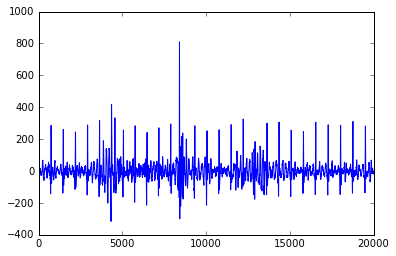

In [434]:
plt.plot(data[170000:190000])


In [452]:
len(markup)

90671

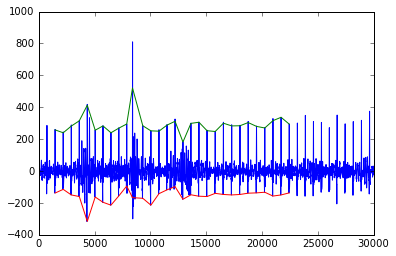

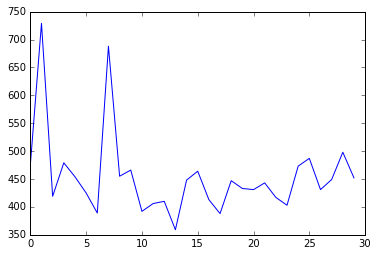

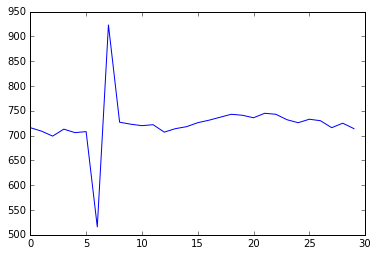

In [443]:
b = 250
a = 220
plt.plot(data[170000:200000])
plt.plot(markup[a:b]-170000, markup_y[a:b])
plt.plot(markup[a:b]-170000, np.array(markup_y[a:b]) - np.array(R[a:b]))
plt.show()
plt.plot(R_new[a:b])
plt.show()
plt.plot(T_new[a:b])

In [445]:
new_R = []
new_T = []
new_R.append(R_new[0])
new_T.append(T_new[0])
for i, t_i in enumerate(T_new[1:]):
    if t_i/new_T[-1] > 0.8 and t_i/new_T[-1] < 1.2:
        new_T.append(t_i)
        new_R.append(R_new[i+1])
        
new_R = np.array(new_R)
new_T = np.array(new_T)
dT = new_T[1:] - new_T[:-1]
dR = new_R[1:] - new_R[:-1]

In [446]:
dR.shape

(69933,)

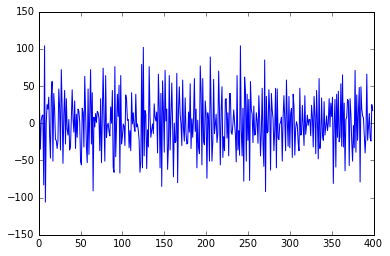

In [450]:
plt.plot (dR[:400])


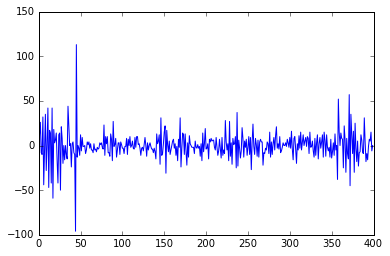

In [451]:
plt.plot (dT[:400])


In [6]:
#перемешиваем R-T интервалы внутри сигнала одного больного для всех больных и считаем характеристики. 
# Тест неслучайности триграммы в последовательности кардиоциклов из статьи воронцова

start = time.clock()
codegramm = {}
F_w = []
B_w = []
for i in range(200):
    print (i, 'exp', 'time', round(time.clock() - start))
    X = []
    for file_i, file_ in enumerate(files[:]): #800 signals ~ 10 min
        if os.path.isfile(path_to_data + "R-T_code/" + str(file_) + '.npy'):
#             print (file_i, file_)

            data = np.load(path_to_data + 'R-T_code/' + str(file_) + '.npy')
            np.random.shuffle(data.T)
            fi = 1.0/(len(data) - 3)

            R = data[0]
            T = data[1]

            a = np.arctan(R/T)
            dT = T[1:] - T[:-1]
            dR = R[1:] - R[:-1]
            da = a[1:] - a[:-1]
            codegramm_i = []
            for i, dt in enumerate(dT):
                if R[i] <= 0 or R[i+1] <= 0:
                    print ('RRRRRRRrR', i, R[i], markup[i], T[i])
                    continue
                elif dt > 0 and dR[i] > 0 and da[i] > 0:
                    codegramm_i.append('A')
                elif dt <= 0 and dR[i] <= 0 and da[i] > 0:
                    codegramm_i.append('B')
                elif dt <=0 and dR[i] > 0 and da[i] > 0:
                    codegramm_i.append('C')
                elif dt > 0 and dR[i] <= 0 and da[i] <= 0:
                    codegramm_i.append('D')
                elif dt > 0 and dR[i] > 0 and da[i] <= 0:
                    codegramm_i.append('E')
                elif dt <= 0 and dR[i] <= 0 and da[i] <= 0:
                    codegramm_i.append('F')
                elif T[i] ==  0 or T[i+1] == 0:
                    continue
                else:
                    print ('ups...', i, 'dt', dt, 'dR', dR[i], 'da', da[i])

            ngramm = CountVectorizer(analyzer='char', ngram_range=(3, 3))
            analyze = ngramm.build_analyzer()
            words = analyze(''.join(codegramm_i))

            X_i = np.zeros(6**3)
            for i in words:
                X_i[trigram2num(i)] += 1

            X_i = X_i/sum(X_i)
            X.append(X_i)
        
    X = np.array(X)
    F_w_i = np.mean(X, axis = 0)
    F_w.append(F_w_i)
    X[X < fi] = 0
    B_w_i = np.mean(X, axis = 0)
    B_w.append(B_w_i)
    
F_w = np.array(F_w)
B_W = np.array(B_w)   
       
print ('time', round(time.clock() - start))

0 exp time 0
1 exp time 586
2 exp time 1167
3 exp time 1747
4 exp time 2329
5 exp time 2909
6 exp time 3490
7 exp time 4071
8 exp time 4653
9 exp time 5234
10 exp time 5815
11 exp time 6396
12 exp time 6978
13 exp time 7560
14 exp time 8142
15 exp time 8723
16 exp time 9303
17 exp time 9885
18 exp time 10467
19 exp time 11049
20 exp time 11630
21 exp time 12211
22 exp time 12793
23 exp time 13373
24 exp time 13954
25 exp time 14535
26 exp time 15117
27 exp time 15699
28 exp time 16280
29 exp time 16861
30 exp time 17442
31 exp time 18023
32 exp time 18604
33 exp time 19185
34 exp time 19767
35 exp time 20347
36 exp time 20929
37 exp time 21509
38 exp time 22092
39 exp time 22672
40 exp time 23253
41 exp time 23835
42 exp time 24416
43 exp time 24998
44 exp time 25579
45 exp time 26160
46 exp time 26741
47 exp time 27323
48 exp time 27903
49 exp time 28485
50 exp time 29065
51 exp time 29645
52 exp time 30226
53 exp time 30808
54 exp time 31390
55 exp time 31972
56 exp time 32552
57 exp

In [7]:
# считает характеристики по исходным сигналам

X = []
for file_i, file_ in enumerate(files[:]):
    if os.path.isfile(path_to_data + "R-T_code/" + str(file_) + '.npy'):
#             print (file_i, file_)

        data = np.load(path_to_data + 'R-T_code/' + str(file_) + '.npy')
        fi = 1.0/(len(data) - 3)

        R = data[0]
        T = data[1]

        a = np.arctan(R/T)
        dT = T[1:] - T[:-1]
        dR = R[1:] - R[:-1]
        da = a[1:] - a[:-1]
        codegramm_i = []
        for i, dt in enumerate(dT):
            if R[i] <= 0 or R[i+1] <= 0:
                print ('RRRRRRRrR', i, R[i], markup[i], T[i])
                continue
            elif dt > 0 and dR[i] > 0 and da[i] > 0:
                codegramm_i.append('A')
            elif dt <= 0 and dR[i] <= 0 and da[i] > 0:
                codegramm_i.append('B')
            elif dt <=0 and dR[i] > 0 and da[i] > 0:
                codegramm_i.append('C')
            elif dt > 0 and dR[i] <= 0 and da[i] <= 0:
                codegramm_i.append('D')
            elif dt > 0 and dR[i] > 0 and da[i] <= 0:
                codegramm_i.append('E')
            elif dt <= 0 and dR[i] <= 0 and da[i] <= 0:
                codegramm_i.append('F')
            elif T[i] ==  0 or T[i+1] == 0:
                continue
            else:
                print ('ups...', i, 'dt', dt, 'dR', dR[i], 'da', da[i])

        ngramm = CountVectorizer(analyzer='char', ngram_range=(3, 3))
        analyze = ngramm.build_analyzer()
        words = analyze(''.join(codegramm_i))

        X_i = np.zeros(6**3)
        for i in words:
            X_i[trigram2num(i)] += 1

        X_i = X_i/sum(X_i)
        X.append(X_i)

X = np.array(X)
F_w_orig = np.mean(X, axis = 0)
X[X < fi] = 0
B_w_orig = np.mean(X, axis = 0)


In [8]:
#смотрим, какие триграммы несут информацию

res1 = np.vstack((B_w_orig - np.min(B_w, axis = 0) < 0, np.max(B_w, axis = 0) - B_w_orig < 0)).T.any(axis=1)

res2 = np.vstack((F_w_orig - np.min(F_w, axis = 0) < 0, np.max(F_w, axis = 0) - F_w_orig < 0)).T.any(axis=1)

DF = (2*F_w_orig - np.min(F_w, axis = 0) - np.max(F_w, axis = 0))/(np.max(F_w, axis = 0) - np.min(F_w, axis = 0))
res3 = np.vstack((DF > 1, DF < -1)).T.any(axis=1)

DB = (2*B_w_orig - np.min(B_w, axis = 0) - np.max(B_w, axis = 0))/(np.max(B_w, axis = 0) - np.min(B_w, axis = 0))
res4 = np.vstack((DB > 1, DB < -1)).T.any(axis=1)

res_all = np.vstack((res1, res2, res3, res4)).T.any(axis=1)
res_all

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [9]:
#trigramm не содержащие информации [  7, 125, 148, 151, 162, 202] по тесту 1
#[119, 149]

np.array(range(2016))[~res_all]

array([119, 149])

In [10]:
np.save(path_to_data + 'bad_trigramm_1', res_all)

Второй тест на информативность. выбираем случайных людей из выборки больных и здоровых. и считаем их больными.

In [11]:
files = selected_pp[iSelected].GIDN.values


In [12]:
# Тест неслучайности триграммы в последовательности кардиоциклов из статьи воронцова

start = time.clock()
codegramm = {}
F_w = []
B_w = []
for i in range(400):
    print (i, 'exp', 'time', round(time.clock() - start))
    files_i = np.random.choice(files, 900)
    X = []
    for file_i, file_ in enumerate(files_i[:]): #800 signals ~ 10 min
        if os.path.isfile(path_to_data + "code_string/" + str(file_) + '.txt'):
#             print (file_i, file_)

            ngramm = CountVectorizer(input = 'file', analyzer='char', ngram_range=(3, 3))
            analyze = ngramm.build_analyzer()
            with open(path_to_data + 'code_string/' + str(file_) + '.txt', "r") as o:
                words = analyze(o)
                
            fi = 1.0/(len(words) - 1)

            X_i = np.zeros(6**3)
            for i in words:
                X_i[trigram2num(i)] += 1

            X_i = X_i/sum(X_i)
            X.append(X_i)
        
    X = np.array(X)
    F_w_i = np.mean(X, axis = 0)
    F_w.append(F_w_i)
    X[X < fi] = 0
    B_w_i = np.mean(X, axis = 0)
    B_w.append(B_w_i)
    
F_w = np.array(F_w)
B_W = np.array(B_w)   
       
print ('time', round(time.clock() - start))

0 exp time 0
1 exp time 150
2 exp time 301
3 exp time 450
4 exp time 601
5 exp time 751
6 exp time 901
7 exp time 1051
8 exp time 1204
9 exp time 1356
10 exp time 1507
11 exp time 1659
12 exp time 1811
13 exp time 1962
14 exp time 2111
15 exp time 2260
16 exp time 2410
17 exp time 2561
18 exp time 2711
19 exp time 2860
20 exp time 3009
21 exp time 3159
22 exp time 3307
23 exp time 3456
24 exp time 3606
25 exp time 3755
26 exp time 3904
27 exp time 4055
28 exp time 4208
29 exp time 4357
30 exp time 4508
31 exp time 4657
32 exp time 4808
33 exp time 4959
34 exp time 5110
35 exp time 5261
36 exp time 5411
37 exp time 5560
38 exp time 5709
39 exp time 5861
40 exp time 6011
41 exp time 6162
42 exp time 6310
43 exp time 6459
44 exp time 6606
45 exp time 6758
46 exp time 6906
47 exp time 7056
48 exp time 7208
49 exp time 7359
50 exp time 7508
51 exp time 7660
52 exp time 7809
53 exp time 7960
54 exp time 8112
55 exp time 8261
56 exp time 8410
57 exp time 8558
58 exp time 8706
59 exp time 8856

In [19]:

iSelected = np.vstack((selected_pp.M8_4_19 == 'Have now', selected_pp.M8_4_19 == 'Have had')).any(axis = 0)
files = selected_pp[iSelected].GIDN.values
len(files)

837

In [21]:
# считает характеристики по исходным сигналам

X = []
for file_i, file_ in enumerate(files):
    if os.path.isfile(path_to_data + "code_string/" + str(file_) + '.txt'):
#             print (file_i, file_)

        ngramm = CountVectorizer(input = 'file', analyzer='char', ngram_range=(3, 3))
        analyze = ngramm.build_analyzer()
        with open(path_to_data + 'code_string/' + str(file_) + '.txt', "r") as o:
            words = analyze(o)

        fi = 1.0/(len(words) - 1)

        X_i = np.zeros(6**3)
        for i in words:
            X_i[trigram2num(i)] += 1

        X_i = X_i/sum(X_i)
        X.append(X_i)

X = np.array(X)
F_w_orig = np.mean(X, axis = 0)
X[X < fi] = 0
B_w_orig = np.mean(X, axis = 0)


In [22]:
#смотрим, какие триграммы несут информацию

res1 = np.vstack((B_w_orig - np.min(B_w, axis = 0) < 0, np.max(B_w, axis = 0) - B_w_orig < 0)).T.any(axis=1)

res2 = np.vstack((F_w_orig - np.min(F_w, axis = 0) < 0, np.max(F_w, axis = 0) - F_w_orig < 0)).T.any(axis=1)

DF = (2*F_w_orig - np.min(F_w, axis = 0) - np.max(F_w, axis = 0))/(np.max(F_w, axis = 0) - np.min(F_w, axis = 0))
res3 = np.vstack((DF > 1, DF < -1)).T.any(axis=1)

DB = (2*B_w_orig - np.min(B_w, axis = 0) - np.max(B_w, axis = 0))/(np.max(B_w, axis = 0) - np.min(B_w, axis = 0))
res4 = np.vstack((DB > 1, DB < -1)).T.any(axis=1)

res_all = np.vstack((res1, res2, res3, res4)).T.any(axis=1)
res_all

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
#trigramm не содержащие информации  по тесту 2 [  0,  14,  17,  18,  27,  32,  33,  44,  50,  51,  66,  69,  73,
#         86,  89,  91,  99, 106, 107, 111, 123, 129, 143, 144, 148, 152,
#        155, 156, 161, 172, 173, 177, 189, 190, 191, 201, 202, 212, 213

np.array(range(2016))[~res_all]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
np.save(path_to_data + 'bad_trigramm_2', res_all)

In [24]:
res2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
(F_w_orig - np.min(F_w, axis = 0))/F_w_orig

array([ 0.08626553,  0.07188518,  0.07237216,  0.07030566,  0.06969238,
        0.07011097,  0.06095717,  0.08421062,  0.04147356,  0.07165513,
        0.10028199,  0.06951626,  0.05694861,  0.08895415,  0.05901752,
        0.04425331,  0.04724356,  0.0637962 ,  0.0526612 ,  0.07199424,
        0.07644448,  0.06117954,  0.05666298,  0.07421813,  0.06324887,
        0.09451965,  0.05175957,  0.05490475,  0.08559404,  0.09234104,
        0.0789888 ,  0.06423369,  0.05129059,  0.05365785,  0.07646228,
        0.06442066,  0.08474536,  0.07695282,  0.04230601,  0.07155809,
        0.09151071,  0.06595299,  0.08216455,  0.13616549,  0.11442279,
        0.1115705 ,  0.14345459,  0.11669949,  0.06744393,  0.11849486,
        0.07781171,  0.069982  ,  0.10126701,  0.05838732,  0.06068345,
        0.12499271,  0.08354065,  0.07504776,  0.13256769,  0.03828933,
        0.07975584,  0.15641578,  0.16534954,  0.14659945,  0.16492871,
        0.08550752,  0.05780127,  0.09891115,  0.05725997,  0.08